In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
csv_file = "./data/stock.adj_close.csv"

rawdata = pd.read_csv(csv_file)
rawdata.head(10)

,Symbol,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
0,A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
1,A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
2,A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0
3,A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,...,11100.0,11350.0,11550.0,11500.0,11550.0,11300.0,11300.0,11050.0,10900.0,10750.0
4,A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,...,12700.0,12700.0,12650.0,12700.0,12800.0,13000.0,13200.0,13150.0,13150.0,13200.0
5,A000070,120000.0,123000.0,123500.0,124500.0,123500.0,125000.0,121500.0,118000.0,121000.0,...,67200.0,68000.0,66500.0,66300.0,65400.0,67500.0,66200.0,65400.0,64500.0,64400.0
6,A000080,20200.0,20400.0,20350.0,21000.0,20750.0,20850.0,20700.0,20650.0,20600.0,...,36700.0,38050.0,37050.0,37600.0,37350.0,37300.0,38500.0,37950.0,37150.0,36850.0
7,A000100,44979.0,42689.0,41406.0,41498.0,41956.0,42139.0,42414.0,41773.0,41590.0,...,65200.0,65500.0,64000.0,64500.0,66600.0,65700.0,68700.0,68400.0,66400.0,66600.0
8,A000120,148000.0,153000.0,152500.0,154000.0,154000.0,161500.0,161500.0,156500.0,152000.0,...,160000.0,156000.0,158000.0,156000.0,156500.0,158000.0,162500.0,177500.0,179500.0,182000.0
9,A000140,9360.0,9440.0,9390.0,9490.0,9510.0,9550.0,9440.0,9430.0,9420.0,...,17150.0,17600.0,17200.0,17300.0,17150.0,17000.0,17250.0,17200.0,17200.0,16700.0


In [91]:
rawdata.shape

(2274, 569)

In [92]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Columns: 569 entries, Symbol to 2020-09-18
dtypes: float64(568), object(1)
memory usage: 9.9+ MB


# 전체적인 흐름 파악을 위한 날짜별 주가 평균 데이터 산출

In [93]:
# 날짜별 주가 평균 데이터 딕셔너리 형태로 저장
price_mean_dict = {}
date_list = rawdata.columns.tolist()

for date in date_list[1:]:
    price_mean_dict[date] = rawdata[date].mean()

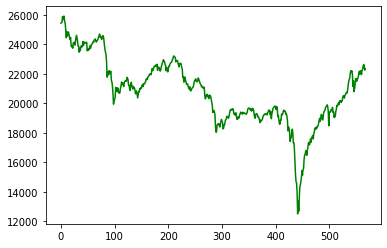

In [94]:
# 전체 주가 흐름 파악을 위한 시각화
x = np.arange(len(price_mean_dict.keys()))
y = price_mean_dict.values()

plt.plot(x, y, "g-")
plt.show()

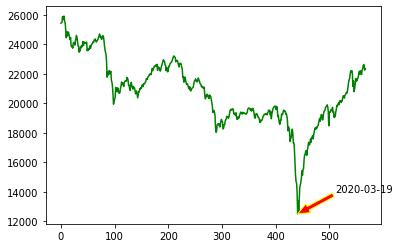

In [95]:
# 주가가 저점을 찍은 시점 날짜 표시
min_price = min(y)
min_price_index = list(y).index(min_price)
min_price_date = list(price_mean_dict.keys())[min_price_index]

plt.plot(x, y, "g-")
plt.annotate(min_price_date,
             xy=(min_price_index, min_price),
             xytext=(min_price_index + 70, min_price + 1500),
             arrowprops=dict(facecolor="red", edgecolor="yellow", headwidth=10))
plt.show()

### => 전체적인 주가 흐름상 특정 시점(2020년 3월 19일) 전후로 일정기간 큰 변동성이 있었음을 확인

# 분석 방향 설정

### * 각 세부 종목별 큰 흐름을 파악한 뒤,
### * 주가 상승률이 높았던 종목들(A그룹)과 그렇지 않았던 종목들(B그룹)을 각각 추출해,
### * 시장 전체의 변동성이 가장 컸던 특정 시점(2020년 3월 19일) 전후로 두 그룹이 각각 어떤 특성을 보였고 어떤 부분에서 유의미한 차이가 있었는지 분석해보고자 함

# 데이터프레임 행열 전환 후 종목별 흐름 파악

In [96]:
rawdata_tr = rawdata.transpose()  # 행열 전환
rawdata_tr

,0,1,2,3,4,5,6,7,8,9,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273
Symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,NaN,7690.0,4970.0,6530.0,38600.0,13850.0,NaN,NaN,NaN
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,NaN,7700.0,4900.0,6870.0,36400.0,14250.0,NaN,NaN,NaN
2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,9390.0,...,3240.0,NaN,7690.0,4940.0,6690.0,36350.0,14450.0,NaN,NaN,NaN
2018-06-07,11650.0,16500.0,3069.0,13800.0,20050.0,124500.0,21000.0,41498.0,154000.0,9490.0,...,3245.0,NaN,7680.0,5140.0,6950.0,38700.0,14300.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,26300.0,14800.0,860.0,11300.0,13000.0,67500.0,37300.0,65700.0,158000.0,17000.0,...,1760.0,1395.0,6960.0,28900.0,4135.0,9540.0,4195.0,13900.0,30050.0,17450.0
2020-09-15,25400.0,14800.0,833.0,11300.0,13200.0,66200.0,38500.0,68700.0,162500.0,17250.0,...,1780.0,1395.0,7010.0,29800.0,4185.0,9540.0,4070.0,13250.0,31450.0,15800.0
2020-09-16,25050.0,14800.0,817.0,11050.0,13150.0,65400.0,37950.0,68400.0,177500.0,17200.0,...,1745.0,1385.0,6990.0,31900.0,4200.0,9540.0,4045.0,13350.0,31750.0,15100.0
2020-09-17,25300.0,14800.0,812.0,10900.0,13150.0,64500.0,37150.0,66400.0,179500.0,17200.0,...,1710.0,1355.0,7030.0,30800.0,4155.0,8010.0,4015.0,13550.0,31200.0,14700.0


In [97]:
# 기존 columns을 첫번째 행 내용으로 일괄 변경(inplace옵션으로 해당 데이터프레임에 바로 적용) 후 첫번째 행 삭제
rawdata_tr.rename(columns=rawdata_tr.iloc[0], inplace=True)
rawdata_tr.drop(rawdata_tr.index[0], inplace=True)
rawdata_tr

,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,NaN,7690.0,4970.0,6530.0,38600.0,13850.0,NaN,NaN,NaN
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,NaN,7700.0,4900.0,6870.0,36400.0,14250.0,NaN,NaN,NaN
2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,9390.0,...,3240.0,NaN,7690.0,4940.0,6690.0,36350.0,14450.0,NaN,NaN,NaN
2018-06-07,11650.0,16500.0,3069.0,13800.0,20050.0,124500.0,21000.0,41498.0,154000.0,9490.0,...,3245.0,NaN,7680.0,5140.0,6950.0,38700.0,14300.0,NaN,NaN,NaN
2018-06-08,11500.0,16600.0,3045.0,13800.0,20400.0,123500.0,20750.0,41956.0,154000.0,9510.0,...,3180.0,NaN,7680.0,5280.0,6740.0,40200.0,14150.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,26300.0,14800.0,860.0,11300.0,13000.0,67500.0,37300.0,65700.0,158000.0,17000.0,...,1760.0,1395.0,6960.0,28900.0,4135.0,9540.0,4195.0,13900.0,30050.0,17450.0
2020-09-15,25400.0,14800.0,833.0,11300.0,13200.0,66200.0,38500.0,68700.0,162500.0,17250.0,...,1780.0,1395.0,7010.0,29800.0,4185.0,9540.0,4070.0,13250.0,31450.0,15800.0
2020-09-16,25050.0,14800.0,817.0,11050.0,13150.0,65400.0,37950.0,68400.0,177500.0,17200.0,...,1745.0,1385.0,6990.0,31900.0,4200.0,9540.0,4045.0,13350.0,31750.0,15100.0
2020-09-17,25300.0,14800.0,812.0,10900.0,13150.0,64500.0,37150.0,66400.0,179500.0,17200.0,...,1710.0,1355.0,7030.0,30800.0,4155.0,8010.0,4015.0,13550.0,31200.0,14700.0


In [135]:
# 종목별 주가 성장율 기준 분석을 위해 해당 정보 딕셔너리로 저장
code_list = rawdata_tr.columns.tolist()
date_list = rawdata_tr.index.tolist()
g_rate_dict = {}
start_date = "2020-03-19"
end_date = "2020-09-18"

for i in range(len(code_list)):
    code = code_list[i]
    g_rate = rawdata_tr[code][date_list.index(end_date)] / rawdata_tr[code][date_list.index(start_date)]
    g_rate_dict[code] = g_rate

In [136]:
# 분석을 위해 데이터프레임 형태로 저장 후 전체적인 분포 현황 등 파악
g_rate_df = pd.DataFrame(data=g_rate_dict.values(), index=g_rate_dict.keys(), columns=["Growth_Rate"])
g_rate_df

,Growth_Rate
A000020,5.025075
A000030,1.000000
A000040,1.804989
A000050,1.490985
A000060,1.437908
...,...
A950160,0.839623
A950170,1.271160
A950180,1.063241
A950190,NaN


In [137]:
g_rate_df.describe()

,Growth_Rate
count,2231.000000
mean,2.052368
std,1.243224
min,0.013055
25%,1.404261
50%,1.786385
75%,2.347997
max,29.954614


array([[<AxesSubplot:title={'center':'Growth_Rate'}>]], dtype=object)

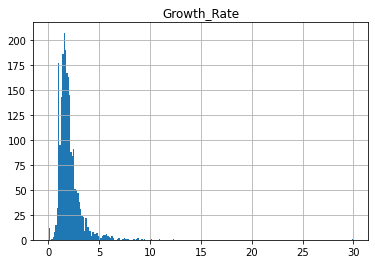

In [141]:
g_rate_df.hist(bins=int(2231/10))

<AxesSubplot:>

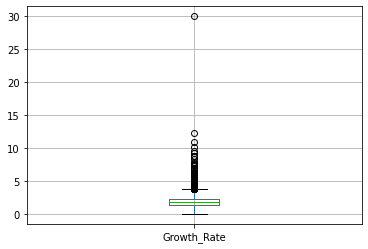

In [139]:
g_rate_df.boxplot(column=["Growth_Rate"])

### => 전반적으로 쏠림 현상과 함께 소수 종목의 성장률이 두드러짐

# 종목별 세부적인 추이 확인을 위한 시각화

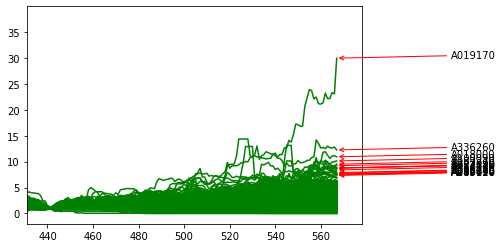

In [154]:
# 전반적 형태 파악을 위한 시각화 : 종목별 변화율(시작일 주가를 1.0으로 변환) 그래프 출력
top_code = []
bottom_code = []
date_arr = rawdata_tr.index.tolist()
start_date = "2020-03-19"  # 특정 시점 설정
x = np.arange(len(date_arr))
max_y = 0.0

for i in range(len(rawdata_tr.columns)):
    code = rawdata_tr.columns[i]
    start_price = rawdata_tr[code][date_arr.index(start_date)]
    y = rawdata_tr[code] / start_price
    plt.plot(x, y, "g-")
    if y[-1] > 7.0:
        plt.annotate(str(code),
                    xy=(x[-1], y[-1]),
                    xytext=(x[-1]+50, y[-1]),
                    arrowprops=dict(arrowstyle="->", lw=1.0, color="r"))
        top_code.append(str(code))
        max_y = max(y[-1], max_y)
    elif y[-1] < 0.1:
        bottom_code.append(str(code))
plt.axis([date_arr.index(start_date) -10,len(x) + 10, -2, max_y + 10])
plt.show()

In [155]:
print(top_code)  # 특정 시점 이후(2020.3.19 ~ 2020.9.18) 상승률 600%(7배) 초과한 종목 Code 추출

['A012790', 'A018000', 'A019170', 'A033270', 'A037270', 'A057880', 'A072520', 'A089150', 'A100090', 'A127120', 'A205470', 'A269620', 'A297090', 'A298040', 'A336260', 'A950130']


### => 주가 상승률이 높은 종목에 대한 세부분석을 위해 추출 작업 진행

In [134]:
print(bottom_code)  # 특정 시점 이후(2020.3.19 ~ 2020.9.18) 상승률 -90%(0.1배) 미만 종목 Code 추출

['A005450', 'A007630', 'A017680', 'A028040', 'A030270', 'A030790', 'A033600', 'A054340', 'A058530', 'A065940', 'A073070', 'A094190', 'A099660', 'A103130', 'A109070', 'A112240', 'A114570', 'A123260', 'A127160', 'A134780', 'A141020', 'A158310', 'A160600', 'A195440', 'A197210', 'A204990', 'A214310', 'A222810', 'A226350', 'A900040']
